# In this notebook i will just look at the data given and do the required cleaning  and preprocessing.

In [29]:
import os
import glob
import pandas as pd
from pathlib import Path
from skimage.io import imread


import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Define path to the data directory
data_dir = Path('../project/data/chest_xray')

# Path to train directory 
train_dir = Path('../project/data/chest_xray/train')

# Path to validation directory
val_dir = Path('../project/data/chest_xray/val')

# Path to test directory
test_dir = Path('../project/data/chest_xray/test')

In [20]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = Path('../project/data/chest_xray/train/NORMAL')
pneumonia_cases_dir = Path('../project/data/chest_xray/train/PNEUMONIA')

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# Check df
train_data.head()

,image,label
0,..\project\data\chest_xray\train\NORMAL\IM-040...,0
1,..\project\data\chest_xray\train\NORMAL\IM-018...,0
2,..\project\data\chest_xray\train\PNEUMONIA\per...,1
3,..\project\data\chest_xray\train\PNEUMONIA\per...,1
4,..\project\data\chest_xray\train\PNEUMONIA\per...,1


In [33]:
# storing train data to call on model notebook
%store train_data

Stored 'train_data' (DataFrame)


1    3875
0    1341
Name: label, dtype: int64


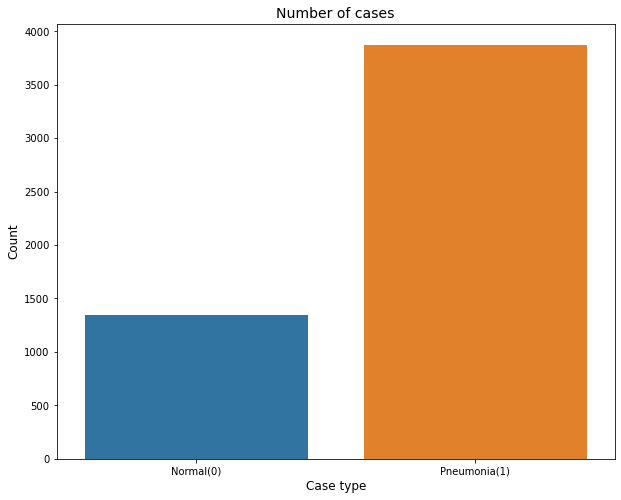

In [21]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

As you can see the data is highly imbalanced. We have almost with thrice pneumonia cases here as compared to the normal cases. This situation is very normal when it comes to medical data. The data will always be imbalanced. 
Either there will be too many normal cases or there will be too many cases with the disease.

Let's look at how a normal case is different from that of a pneumonia case. We will look at somes samples from our training data itself.

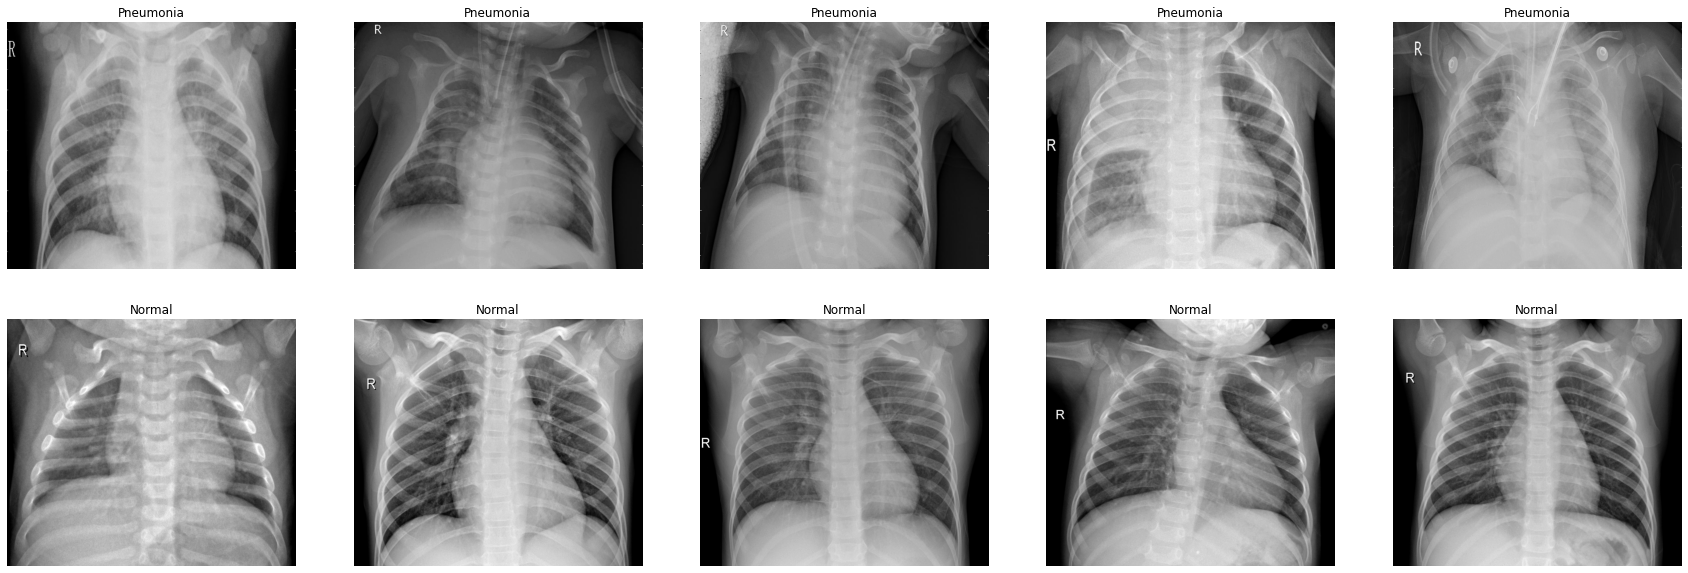

In [30]:
# Get few samples for both the classes
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

If you look carefully, then there are some cases where you won't be able to differentiate between a normal case and a pneumonia case with the naked eye. There is one case in the above plot, at least for me ,which is too much confusing. If we can build a robust classifier, it would be a great assist to the doctor too.

# What is a Convolutional Neural Network? How does it work?

* A Convolutional Neural Network is a special type of an Artificial Intelligence implementation which uses a special mathematical matrix manipulation called the convolution operation to process data from the images.
* A convolution does this by multiplying two matrices and yielding a third, smaller matrix.
* The Network takes an input image, and uses a filter (or kernel) to create a feature map describing the image.
* In the convolution operation, we take a filter (usually 2x2 or 3x3 matrix ) and slide it over the image matrix. The coresponding numbers in both matrices are multiplied and and added to yield a single number describing that input space. This process is repeated all over the image.This can be seen in the following animation:
![cnn](images/cnn.gif)

     This is a 2-D representation of calculations happening in 3 dimensions. This is what is actually happening:
   ![cnn2](images/cnn2.png)

* We use different filters to pass over our inputs, and take all the feature maps, put them together as the final output of the convolutional layer.
* We then pass the output of this layer through a non-linear activation function. The most commonly used one is ReLU.
* The next step of our process involves further reducing the dimensionality of the data which will lower the computation power required for training this model. This is achieved by using a Pooling Layer. The most commonly used one is max pooling which takes the maximum value in the window created by a filter. This significantly reduces the training time and preserves significant information.
![cnn3](images/cnn3.png)

### Two of the most commonly associated words with CNN are stride and padding

STRIDE: Stride just means the amount a filter moves during a covolution operation. So, a stride of 1 means that the filter will slide 1 pixel after each covolution operation as shown in this animation.
![cnn4](images/cnn4.gif)

PADDING: Padding is just zero value pixels that surround the input image. This protects the loss of any valuable information since the feature map is ever shrinking.